# Kaggle Competition

# Titanic: Machine Learning from Disaster

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## 1. Loading the Training Data

In [2]:
raw_df = pd.read_csv('data/train.csv', index_col=0)
raw_df.fillna(0, inplace=True)
raw_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


## 2. Pre-process the data

Now the columns need to be transformed to numbers.

In [3]:
raw_df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
Name        891 non-null object
Sex         891 non-null object
Ticket      891 non-null object
Cabin       891 non-null object
Embarked    891 non-null object
dtypes: object(5)
memory usage: 41.8+ KB


### Name


In [4]:
raw_df.Name = pd.Categorical(raw_df.Name, ordered=False)
raw_df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: category
Categories (891, object): [Abbing, Mr. Anthony, Abbott, Mr. Rossmore Edward, Abbott, Mrs. Stanton (Rosa Hunt), Abelson, Mr. Samuel, ..., de Pelsmaeker, Mr. Alfons, del Carlo, Mr. Sebastiano, van Billiard, Mr. Austin Blyler, van Melkebeke, Mr. Philemon]

### Sex

In [5]:
raw_df.Sex = pd.Categorical(raw_df.Sex, ordered=False)
raw_df.Sex.head()

PassengerId
1      male
2    female
3    female
4    female
5      male
Name: Sex, dtype: category
Categories (2, object): [female, male]

### Ticket

In [6]:
raw_df.Ticket = pd.Categorical(raw_df.Ticket, ordered=False)
raw_df.Ticket.head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: category
Categories (681, object): [110152, 110413, 110465, 110564, ..., W./C. 6609, W.E.P. 5734, W/C 14208, WE/P 5735]

### Cabin

In [7]:
raw_df.Cabin = pd.Categorical(raw_df.Cabin, ordered=False)
raw_df.Cabin.head()

PassengerId
1       0
2     C85
3       0
4    C123
5       0
Name: Cabin, dtype: category
Categories (148, object): [0, A10, A14, A16, ..., F38, F4, G6, T]

### Embarked

In [8]:
raw_df.Embarked = pd.Categorical(raw_df.Embarked, ordered=False)
raw_df.Embarked.head()

PassengerId
1    S
2    C
3    S
4    S
5    S
Name: Embarked, dtype: category
Categories (4, object): [0, C, Q, S]

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null category
Sex         891 non-null category
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null category
Fare        891 non-null float64
Cabin       891 non-null category
Embarked    891 non-null category
dtypes: category(5), float64(2), int64(4)
memory usage: 134.4 KB


### Categorical Columns

In categorical columns, replace the text by their codes

In [10]:
cat_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
for col in cat_cols:
    raw_df[col] = raw_df[col].cat.codes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null int16
Sex         891 non-null int8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null int16
Fare        891 non-null float64
Cabin       891 non-null int16
Embarked    891 non-null int8
dtypes: float64(2), int16(3), int64(4), int8(2)
memory usage: 55.7 KB


### Train data

Split dataset to build the model. Not separating validation dataset yet.

In [11]:
y = raw_df.Survived
df = raw_df.drop('Survived', axis=1)

In [12]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=30)
m.fit(df, y)
m.score(df, y)

1.0

### Split train test
Ok, now to test overfitting let's split the train dataset, into train and test.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
m.fit(X_train, y_train)
m.score(X_test, y_test)

0.8097014925373134

In [14]:
import math
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [15]:
m.fit(X_train, y_train)
print_score(m)

[0.0, 0.436232171512701, 1.0, 0.8097014925373134]


In [22]:
m = RandomForestClassifier(n_jobs=-1, n_estimators=30, min_samples_leaf=1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.056659269967007354, 0.42320736951515897, 0.9967897271268058, 0.8208955223880597, 0.8154093097913323]


### Cross-validation

In [23]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(m, df, y, cv=5))

0.8261297395867135

### Grid Search 

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[10,20,30,40,50],
              'min_samples_leaf':np.arange(1,10),
              'oob_score':[True]}
cv = GridSearchCV(m, param_grid, cv=5)

In [ ]:
cv.fit(df,y)

In [20]:
cv.best_params_

{'min_samples_leaf': 1, 'n_estimators': 30, 'oob_score': True}

In [21]:
cv.best_score_

0.8271604938271605

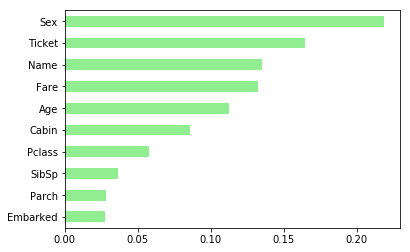

In [24]:
importances_rf = pd.Series(m.feature_importances_, index = df.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

### Test dataset from Kaggle

Run prediction on kaggle 'test' dataset

In [28]:
test_kaggle = pd.read_csv('data/test.csv', index_col=0)
test_kaggle.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
def preprocess(df):
    df = df.fillna(0)
    cat_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
    for col in cat_cols:
        df[col] = pd.Categorical(df[col], ordered=False)
        df[col] = df[col].cat.codes
    return df


In [41]:
test_kaggle = preprocess(test_kaggle)
y_pred = m.predict(test_kaggle)
y_pred[1:10]

array([0, 0, 0, 1, 0, 1, 0, 1, 0])

### Save results to dataframe and write to csv submission file

In [48]:
results = pd.DataFrame({'PassengerId':test_kaggle.index,'Survived':y_pred}).set_index('PassengerId')
results.head()
results.to_csv('data/kaggle-titanic-sub001.csv')